In [ ]:
"""
(2) Classificação com K-Nearest Neighbors (KNN)

Construa um modelo KNN para prever a classe de um conjunto de dados (por
exemplo, Wine). Utilize validação cruzada para ajustar o número de vizinhos e avalie o
desempenho com a métrica F1-Score.
__________________________________________________________________________________________

(2) Classification with K-Nearest Neighbors (KNN)

Build a KNN model to predict the class of a dataset (e.g., Wine). Use
cross-validation to fine-tune the number of neighbors and evaluate the performance
using the F1-Score metric.

"""

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [ ]:
# Loading the Wine dataset
wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

print(wine_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
wine_df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [ ]:
# Removing the 'target' column to get only the columns which are
# supposed to be studied for the classification
x = wine_df.drop('target', axis=1)

y = wine_df['target']

In [ ]:
# Splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

print("{0:0.2f}% in the training set".format((len(x_train)/len(wine_df.index)) * 100))
print("{0:0.2f}% int the validation set".format((len(x_test)/len(wine_df.index)) * 100))

74.72% in the training set
25.28% int the validation set


In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# Testing different values for K (1 to 20)
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracies.append(accuracy_score(y_test, y_pred))

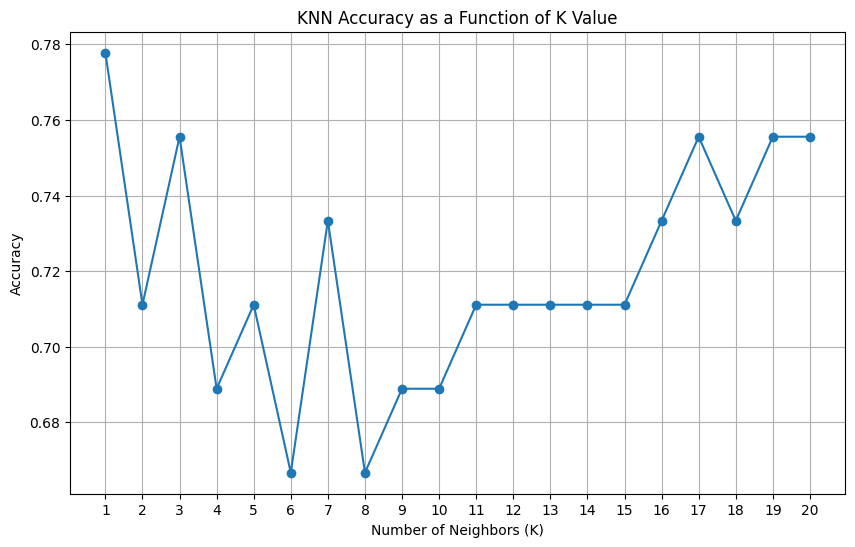

In [ ]:
# PLOTTING THE ACCURACY SCORE RELATING TO THE K VALUE
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy as a Function of K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

In [ ]:
# Training the model again, now using the best value of K according to the graphic
best_k = 1
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(x_train_scaled, y_train)
y_pred_best = knn_best.predict(x_test_scaled)

In [ ]:
# MODEL ACCURACY AND CLASSIFICATION REPORT
wine_df_accuracy = accuracy_score(y_test, y_pred_best)
wine_df_classif_report = classification_report(y_test, y_pred_best)

print("ACCURACY SCORE:")
print(wine_df_accuracy)
print("\n")
print("CLASSIFICATION REPORT:")
print(wine_df_classif_report)

ACCURACY SCORE:
0.9555555555555556


CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.89      0.94        18
           2       0.92      1.00      0.96        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [ ]:
# MEASURING F1-SCORE (in different calculation methods, just to make sure)
f1_macro = f1_score(y_test, y_pred_best, average='macro')
f1_micro = f1_score(y_test, y_pred_best, average='micro')
f1_weighted = f1_score(y_test, y_pred_best, average='weighted')

print(f'Macro F1 Score: {f1_macro:.2f}')
print(f'Micro F1 Score: {f1_micro:.2f}')
print(f'Weighted F1 Score: {f1_weighted:.2f}')

Macro F1 Score: 0.96
Micro F1 Score: 0.96
Weighted F1 Score: 0.96
